# CoreMS Assignments to CA Guardian

`CoreMS` framework for mass spectrum


### 1. Import Data File


In [3]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [4]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_3sigma_101221.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks
9: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks
10: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1061_01_02_sum250_3sigma.pks

### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.

#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"signal_noise"`, and the minimum is set to `6` (default=6). The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.

The total number of peaks (92,307) is illustrated with `len(mass_spectrum)`.

In [5]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "signal_noise"
MSParameters.mass_spectrum.noise_threshold_min_s2n = 6

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Set Kendrick base
kb = {"C": 2, "H": 4, "O": 1}
MSParameters.ms_peak.kendrick_base = kb

# Specify file path
file_location = filepaths[5]
print(f"file locations: {file_location}")

file locations: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks


16954


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

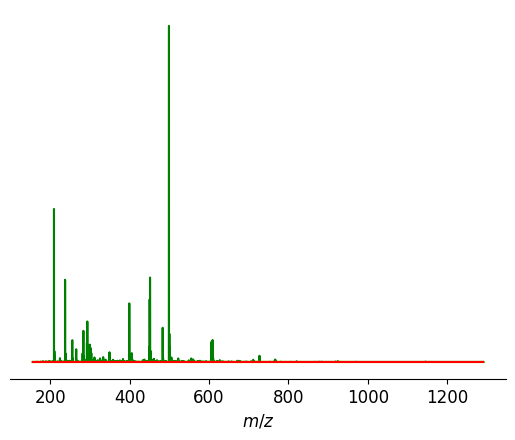

In [8]:
mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_profile_and_noise_threshold()

### 3. Access mass spectrum peak objects


In [9]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 498.9301834 m/z | 100.0000 abundance | 2057863.0 resolving power | 199053.4 S/N | -0.6331 KMD
2: 209.0852947 m/z | 45.5220 abundance | 4081198.0 resolving power | 90611.3 S/N | -0.9608 KMD
3: 451.2286785 m/z | 25.1160 abundance | 2017010.0 resolving power | 49992.4 S/N | -0.9600 KMD
4: 237.1166102 m/z | 24.4520 abundance | 4133270.0 resolving power | 48670.6 S/N | -0.9754 KMD
5: 450.2323104 m/z | 18.6080 abundance | 2000576.0 resolving power | 37038.3 S/N | -0.9642 KMD
6: 398.9366076 m/z | 17.4190 abundance | 2676893.0 resolving power | 34672.2 S/N | -0.6991 KMD
7: 293.1560418 m/z | 12.0360 abundance | 3243472.0 resolving power | 23955.7 S/N | -0.9815 KMD
8: 483.0417321 m/z | 10.1610 abundance | 1991086.0 resolving power | 20224.1 S/N | -0.7541 KMD
9: 283.2642539 m/z | 9.2580 abundance | 3357090.0 resolving power | 18427.3 S/N | -0.0956 KMD
10: 499.9335360 m/z | 8.3780 abundance | 2022618.0 resolving power | 16676.1 S/N | -0.6359 KMD
11: 498.9327640 m/z

In [10]:
print(f"Kendrick base: {mass_spectrum.mspeaks_settings.kendrick_base}")


Kendrick base: {'C': 2, 'H': 4, 'O': 1}


### 4. Molecular formula search
The formula database isn't built until the `SearchMolecularFormulas` method is run.

See [database_initialization.md](/home/corems/docs/user_guide/database_initialization.md) and [molecular_formula_search.md](/home/corems/docs/user_guide/molecular_formula_search.md) for details about the molecular formula database and search process. Both database initialization and molecular formula searching rely establishing the relevant heteroatom space.

Numerous parameters can be set to facilitate the molecular search process, including element number and element ratio constraints, and ppm and isotope abundance error constraints. Many of these constraints are illustrated below. In the following example, `first_hit = False`, meaning that peaks aren't skipped when a molecular formula has already been assigned.

In [11]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas

# Ion Types
mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isAdduct = False

# Atom constraints
mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 100)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)   # Max H for C100 is 202
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 4)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 30)
# mass_spectrum.molecular_search_settings.usedAtoms["P"] = (0, 1)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass error constraints
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -0.2   # Bahureksa paper 0.4
mass_spectrum.molecular_search_settings.max_ppm_error = 0.2

# DBE constraints - Can always throw out high Mod AI (> 0.5 = aromatic and > 0.67 = condensed aromatic)
mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 66   # Max DBE 66 for C100 (empirical Max DBE = 2C/3)

# H/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_hc_filter = 0.2
mass_spectrum.molecular_search_settings.max_hc_filter = 3.1

# O/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_oc_filter = 0
mass_spectrum.molecular_search_settings.max_oc_filter = 1.2

# O/P ratio constraints
# mass_spectrum.molecular_search_settings.min_op_filter = 2

# Isotope abundance constraints
mass_spectrum.molecular_search_settings.min_abun_error = -15
mass_spectrum.molecular_search_settings.max_abun_error = 15


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)


'runworker'  651.84 ms


Loading molecular formula database: 360830it [00:28, 12701.23it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 10}, (de)protonated : 100%|██████████| 300/300 [00:30<00:00,  9.76it/s]
Loading molecular formula database: 149881it [00:15, 9379.77it/s] 
Started molecular formula search for class {"N": 4, "S": 2, "O": 30}, (de)protonated : 100%|██████████| 150/150 [00:12<00:00, 12.20it/s]


'run_molecular_formula'  88740.75 ms
5295 assigned peaks and 11659 unassigned peaks, total  = 31.23 %, relative abundance = 31.84 %, RMS error (best candidate) (ppm) = 0.068


(5295, 11659, 31.231567771617318, 31.83989630826786, 0.0677247969816859)

### 5. Visualizing Results

The tools for exploring and visualizing molecular formula assignment results are primarily contained in `HeteroatomsClassification`, consistent with the use of heteroatom space to define search space.

<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

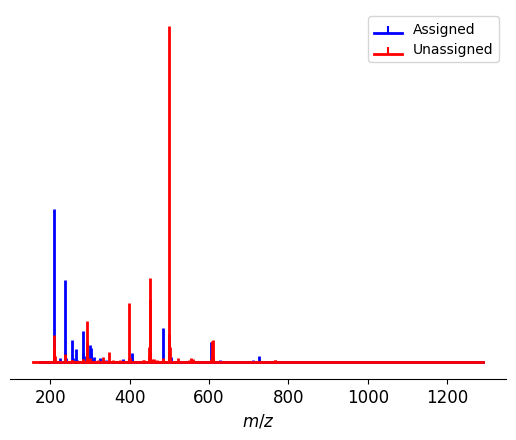

In [12]:
from corems.molecular_id.factory.classification import HeteroatomsClassification

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### 6. Exploring Mass Spectrum

In [15]:
for mspeaks in mass_spectrum.sort_by_abundance(reverse=True)[:20]:
    for mf in mspeaks:
        print(f"Abundance: {mspeaks.abundance:.2f} | "
                f"Exp m/z: {mspeaks.mz_exp:.7f} | "
              f"calc m/z: {mf.mz_calc:.6f} | "
              f"Error: {mf.mz_error:.6f} | "
              f"DBE: {mf.dbe} | "
              f"H/C: {mf.H_C:.6f} | "
              f"O/C: {mf.O_C:.6f} | "
              f"AI mod: {mf.A_I_mod:.6f} | "
              f"KMD: {mf.kmd:.4f} | "
              f"Class: {mf.class_label} | "
              f"Formula: {mf.string_formated}")

Abundance: 45.52 | Exp m/z: 209.0852947 | calc m/z: 209.085304 | Error: -0.043430 | DBE: 0.0 | H/C: 2.250000 | O/C: 0.500000 | AI mod: 0.000000 | KMD: -0.9608 | Class: S1 O4 | Formula: C₈H₁₈O₄S₁
Abundance: 24.45 | Exp m/z: 237.1166102 | calc m/z: 237.116604 | Error: 0.026529 | DBE: 0.0 | H/C: 2.200000 | O/C: 0.400000 | AI mod: 0.000000 | KMD: -0.9754 | Class: S1 O4 | Formula: C₁₀H₂₂O₄S₁
Abundance: 10.16 | Exp m/z: 483.0417321 | calc m/z: 483.041643 | Error: 0.183717 | DBE: 12.0 | H/C: 0.842105 | O/C: 0.789474 | AI mod: 0.391304 | KMD: -0.7540 | Class: O15 | Formula: C₁₉H₁₆O₁₅
Abundance: 9.26 | Exp m/z: 283.2642539 | calc m/z: 283.264254 | Error: -0.000166 | DBE: 1.0 | H/C: 2.000000 | O/C: 0.111111 | AI mod: 0.000000 | KMD: -0.0956 | Class: O2 | Formula: C₁₈H₃₆O₂
Abundance: 6.48 | Exp m/z: 255.2329561 | calc m/z: 255.232954 | Error: 0.008940 | DBE: 1.0 | H/C: 2.000000 | O/C: 0.125000 | AI mod: 0.000000 | KMD: -0.0810 | Class: O2 | Formula: C₁₆H₃₂O₂
Abundance: 5.85 | Exp m/z: 605.0454717

In [16]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_mz()[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 155.0674301 m/z | 0.0040 abundance | 3117995.0 resolving power | 6.4 S/N | -0.9751 KMD
2: 155.0935362 m/z | 0.0040 abundance | 1924657.0 resolving power | 6.5 S/N | -0.0012 KMD
3: 155.0936004 m/z | 0.0040 abundance | 3348880.0 resolving power | 6.4 S/N | -0.0013 KMD
4: 155.1256040 m/z | 0.0210 abundance | 4369963.0 resolving power | 40.6 S/N | -0.0332 KMD
5: 155.1695852 m/z | 0.0040 abundance | 3080177.0 resolving power | 6.2 S/N | -0.0772 KMD
6: 155.2886669 m/z | 0.0040 abundance | 3059465.0 resolving power | 6.0 S/N | -0.1962 KMD
7: 155.2887286 m/z | 0.0040 abundance | 3532934.0 resolving power | 6.4 S/N | -0.1963 KMD
8: 155.3620218 m/z | 0.0090 abundance | 6239923.0 resolving power | 15.5 S/N | -0.2695 KMD
9: 155.4352651 m/z | 0.0040 abundance | 2329619.0 resolving power | 7.0 S/N | -0.3427 KMD
10: 155.5117989 m/z | 0.0110 abundance | 4520475.0 resolving power | 21.1 S/N | -0.4192 KMD
11: 155.5241162 m/z | 0.0040 abundance | 3531795.0 resolving power

### 7. Exporting Molecular Formula Results

In [17]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "CA_Guardian_neg_CoreMS.csv"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,O,N,S,13C,15N,17O,18O,33S,34S,36S
0,419,175.025698,175.025698,175.025681,0.004,NaN,3055188.0,6.193,-1,0.095970,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,484,179.034991,179.034991,179.034982,0.007,NaN,4616163.0,12.632,-1,0.048684,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,527,181.032881,181.032881,181.032874,0.004,NaN,629104.0,6.717,-1,0.036549,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,558,182.049271,182.049271,182.049253,0.005,NaN,4331854.0,7.430,-1,0.100392,...,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,627,185.154738,185.154738,185.154703,0.007,NaN,2538534.0,11.513,-1,0.185273,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.sort_values(by=["Peak Height"], ascending=False).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,O,N,S,13C,15N,17O,18O,33S,34S,36S
14661,13012,498.930183,498.930183,NaN,100.000,NaN,2057863.0,199053.428,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1141,209.085295,209.085295,209.085304,45.522,NaN,4081198.0,90611.329,-1,-0.043430,...,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13632,11357,451.228679,451.228679,NaN,25.116,NaN,2017010.0,49992.359,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,2228,237.116610,237.116610,237.116604,24.452,NaN,4133270.0,48670.560,-1,0.026529,...,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13517,11206,450.232310,450.232310,NaN,18.608,NaN,2000576.0,37038.324,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12570,9609,398.936608,398.936608,NaN,17.419,NaN,2676893.0,34672.176,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9336,4782,293.156042,293.156042,NaN,12.036,NaN,3243472.0,23955.730,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3462,12434,483.041732,483.041732,483.041643,10.161,NaN,1991086.0,20224.149,-1,0.183717,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,4259,283.264254,283.264254,283.264254,9.258,NaN,3357090.0,18427.308,-1,-0.000166,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14941,13359,499.933536,499.933536,NaN,8.378,NaN,2022618.0,16676.147,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.sort_values(by=["m/z"], ascending=True).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,O,N,S,13C,15N,17O,18O,33S,34S,36S
5305,0,155.067430,155.067430,NaN,0.004,NaN,3117995.0,6.357,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5306,1,155.093536,155.093536,NaN,0.004,NaN,1924657.0,6.457,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5307,2,155.093600,155.093600,NaN,0.004,NaN,3348880.0,6.426,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5308,3,155.125604,155.125604,NaN,0.021,NaN,4369963.0,40.562,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5309,4,155.169585,155.169585,NaN,0.004,NaN,3080177.0,6.207,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5310,5,155.288667,155.288667,NaN,0.004,NaN,3059465.0,6.031,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5311,6,155.288729,155.288729,NaN,0.004,NaN,3532934.0,6.407,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5312,7,155.362022,155.362022,NaN,0.009,NaN,6239923.0,15.475,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5313,8,155.435265,155.435265,NaN,0.004,NaN,2329619.0,7.017,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5314,9,155.511799,155.511799,NaN,0.011,NaN,4520475.0,21.066,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`mass_spectrum.to_csv` and `mass_spectrum.to_dataframe` produce tables with the following columns.

In [20]:
for col in df.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
C
H
O
N
S
13C
15N
17O
18O
33S
34S
36S


In [21]:
from corems.mass_spectrum.output.export import HighResMassSpecExport

# Create an export instance
# You need to provide an output file path (even though we're just getting a DataFrame)
# Create output paths for different formats
csv_file = exports_dir / "CA_Guardian_neg_CoreMS_plus.csv"

exporter = HighResMassSpecExport(csv_file, mass_spectrum, output_type="pandas")

# If you want additional columns (like Aromaticity Index)
df_with_extras = exporter.get_pandas_df(additional_columns=["Aromaticity Index"])

In [22]:
df_with_extras.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,O,N,S,13C,15N,17O,18O,33S,34S,36S
0,419,175.025698,175.025698,175.025681,0.004,NaN,3055188.0,6.193,-1,0.095970,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,484,179.034991,179.034991,179.034982,0.007,NaN,4616163.0,12.632,-1,0.048684,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,527,181.032881,181.032881,181.032874,0.004,NaN,629104.0,6.717,-1,0.036549,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,558,182.049271,182.049271,182.049253,0.005,NaN,4331854.0,7.430,-1,0.100392,...,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,627,185.154738,185.154738,185.154703,0.007,NaN,2538534.0,11.513,-1,0.185273,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for col in df_with_extras.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
Aromaticity Index
C
H
O
N
S
13C
15N
17O
18O
33S
34S
36S
